<a href="https://colab.research.google.com/github/Anushka417/bizlers.htm/blob/master/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [14]:
ds = pd.read_csv('Bank_Personal_Loan_Modelling.csv')


In [15]:
ds.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
ds.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [17]:
ds.shape

(5000, 14)

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
ds.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [21]:
ds.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [22]:
for col in ds.columns:
    print(col + ' Col Unique values: ', ds[col].unique(), '\n\n')

ID Col Unique values:  [   1    2    3 ... 4998 4999 5000] 


Age Col Unique values:  [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23] 


Experience Col Unique values:  [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43] 


Income Col Unique values:  [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 

In [38]:
zero_mortgage = 0
for zero in ds['Mortgage']:
    if zero == 0:
        zero_mortgage += 1
print('Number of people with zero mortgage ', zero_mortgage)

Number of people with zero mortgage  3462


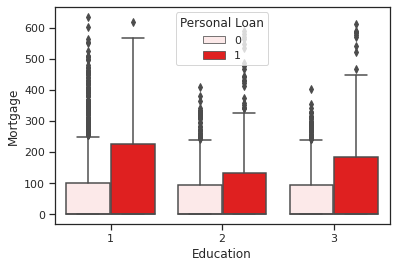

In [40]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=ds,color='red')

In [39]:
cc_avg = 0
for avg in ds['CCAvg']:
    if avg == 0:
        cc_avg += 1
print('Number of people with zero credit card spending per month: ', cc_avg)

Number of people with zero credit card spending per month:  106


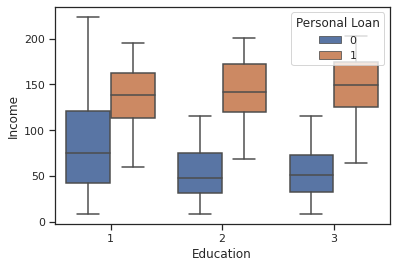

In [41]:
sns.boxplot(x="Education",y='Income',hue='Personal Loan',data=ds)

In [42]:
categorical_col = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Col', 'CreditCard']

for col in categorical_col:
    val = 0
    for value in col:
        val += 1
    print('Value count of ' + col + ':', val)

Value count of Personal Loan: 13
Value count of Securities Account: 18
Value count of CD Account: 10
Value count of Online Col: 10
Value count of CreditCard: 10


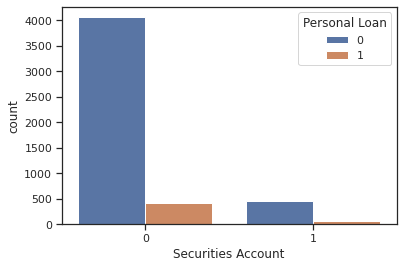

In [43]:
sns.countplot(x="Securities Account", data=ds,hue="Personal Loan")


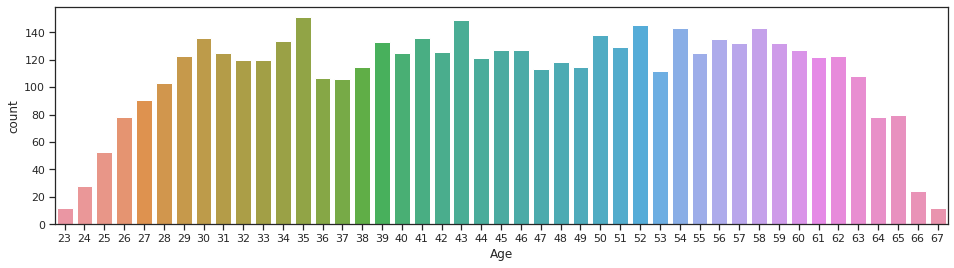

In [45]:
plt.figure(figsize=(16,4))
sns.set_color_codes()
sns.countplot(ds["Age"])

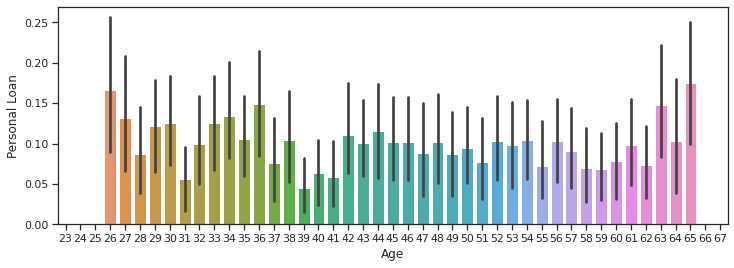

In [46]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.barplot(ds["Age"],ds["Personal Loan"])

In [23]:
ds[ds['Experience'] < 0]['Experience'].count()

52

In [24]:
dfExp = ds.loc[ds['Experience'] >0]
negExp = ds.Experience < 0
column_name = 'Experience'
mylist = ds.loc[negExp]['ID'].tolist()

In [25]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [26]:
for id in mylist:
    age = ds.loc[np.where(ds['ID']==id)]["Age"].tolist()[0]
    education = ds.loc[np.where(ds['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    ds.loc[ds.loc[np.where(ds['ID']==id)].index, 'Experience'] = exp

In [27]:
ds[ds['Experience'] < 0]['Experience'].count()

0

In [28]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Text(0, 0.5, 'Age')

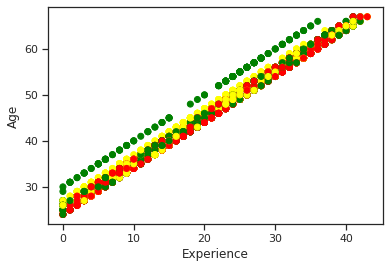

In [35]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(ds['Experience'],ds['Age'],c=ds['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

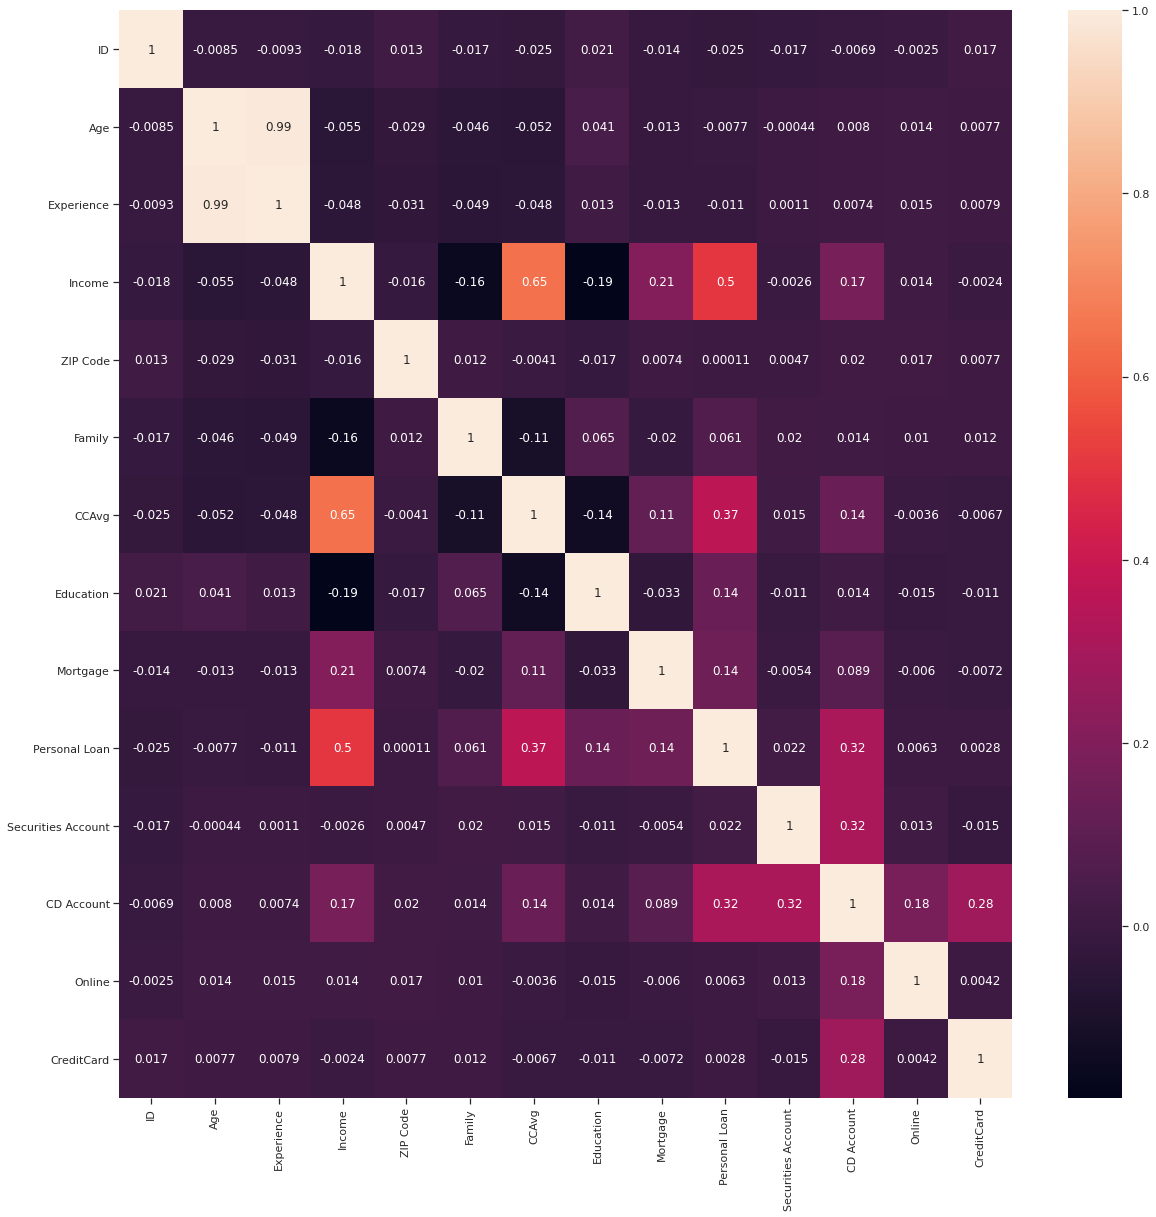

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(ds[ds.corr().index].corr(),annot=True)
plt.show()

In [49]:
from sklearn.feature_selection import SelectKBest

In [52]:
X = ds.drop(columns = ['ID', 'Personal Loan'])
y = ds['Personal Loan']

In [54]:
ds.corrwith(ds["Personal Loan"]).abs().nlargest(5)

Personal Loan    1.000000
Income           0.502462
CCAvg            0.366889
CD Account       0.316355
Mortgage         0.142095
dtype: float64

In [62]:
X = ds.drop(columns = ['ID','Age','Experience','ZIP Code', 'Family', 'Education','Personal Loan','Securities Account', 'Online','CreditCard']).values
y = ds['Personal Loan'].values


In [71]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ds.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**Logistic regression**

In [85]:
def model_evaluate(model, test):
    y_pred = model.predict(test)
    print('Metrics: \n', classification_report(y_test, y_pred))
   

In [86]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

model_evaluate(model, x_test)

Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1372
           1       0.63      0.45      0.52       128

    accuracy                           0.93      1500
   macro avg       0.79      0.71      0.74      1500
weighted avg       0.92      0.93      0.92      1500



In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [59]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [60]:
test_set.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


In [87]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [88]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

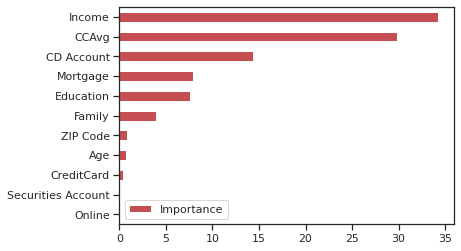

In [89]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [90]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.904

In [91]:
train_set_indep = ds.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = ds["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [92]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [93]:
X=ds.drop(['Personal Loan','Experience','ID'],axis=1)
y=ds.pop('Personal Loan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.898600 (0.008902)
CART: 0.982600 (0.003353)
NB: 0.885600 (0.010385)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.986800 (0.003816)


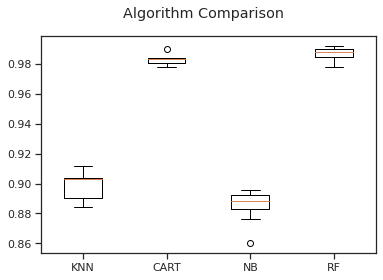

In [94]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**CONCLUSION**

The aim of the  bank is to convert there liability customers into loan customers.The bank's expectation from the dataset is to take out loans to its debtor customers and turn them into loan customers. Therefore, it is desired to create a new marketing campaign by making inferences about the connection between the variables.
Here i import the dataset Naming "ds" and libraries,then checked its shape,null values and display the head and tail of the Dataset. The file aur say dataframe is already clean, so there is no need of cleaning some transmormation is done. Then i display the no of unique in each columna, people with zero mortage,people with Zero credit card Spending Per Month,counts of all categorial columns,and then univariate bivariate analysis with some graph Representation.
Here i set the data into training and test set int ratio of 70:30 and use the logistic regression model to predict the costumer buying personal lone.
 Four classification algorithms were used in this study. those are KNN ( K - Nearest Neighbour ),Random Forest classifier,Naive Bayes and Decision tree classifier. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model
